In [131]:
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
# Importing the data
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [133]:
x_train.shape, x_test.shape # Size of test and train data (amount of images, width, height)

((60000, 28, 28), (10000, 28, 28))

In [134]:
x_train[0] #Single Image (28x28 pixel values, each value between 0-255)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [135]:
y_train #Output data: Label of the image (0-9)

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

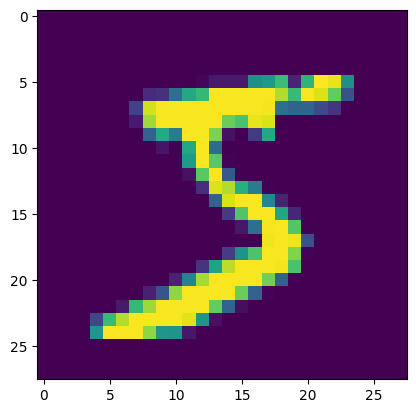

In [136]:
plt.imshow(x_train[0]) #Plotting the first image in the training data

In [137]:
from tensorflow.keras.utils import to_categorical

In [138]:
# Converting the output labels to categorical arrays so that we can use them in the model
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_test.shape

(10000, 10)

In [139]:
# Scaling the input data to be between 0 and 1 (instead of 0-255)
x_train = x_train / 255
x_test = x_test / 255

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [141]:
# Building the CNN model
# Defining the model as sequential (one layer after the other)
model = Sequential()

# Add a convolutional layer that looks at the image with 32 small 3×3 filters, uses ReLU activation to decide what to keep, and expects input images that are 28×28×1 (aka 28×28 pixel images in grayscale(1 color channel)).
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
# Add a max pooling layer that looks at 2×2 areas and keeps the maximum value (to reduce the size of the data and keep only the most important information)
model.add(MaxPool2D((2,2)))

# Add a flatten layer to convert the 2D data from the previous layers into a 1D array (so we can use it in a dense layer because dense layers only take 1D input)
model.add(Flatten())
# Add a dense layer to combine the features extracted by the convolutional layers and learn complex patterns. This layer has 128 neurons and uses ReLU activation.
model.add(Dense(128, activation='relu'))
# Add a dense output layer with 10 neurons (one for each number) and softmax activation to get probabilities for which number the image is of. We use the dense layer here because we want to combine all the features learned by the previous layers to make a final prediction. The softmax activation is used because we want the output to be a probability distribution over the 10 classes (Numbers 0-9).
model.add(Dense(10, activation='softmax'))

model.summary() # Summary of the model architecture

C:\Users\jishn\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [142]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2) # This callback will stop training if the validation loss does not improve for 2 consecutive epochs, which helps to prevent overfitting.

In [143]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Compiling the model

In [144]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop]) # Training the model for 10 epochs. Notice we input the early stopping callback to stop training if the model starts to overfit (if the validation loss does not improve for 2 consecutive epochs).

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9543 - loss: 0.1537 - val_accuracy: 0.9759 - val_loss: 0.0712
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9837 - loss: 0.0541 - val_accuracy: 0.9832 - val_loss: 0.0515
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9905 - loss: 0.0331 - val_accuracy: 0.9836 - val_loss: 0.0500
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9944 - loss: 0.0207 - val_accuracy: 0.9848 - val_loss: 0.0543
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9959 - loss: 0.0142 - val_accuracy: 0.9825 - val_loss: 0.0617


<Axes: >

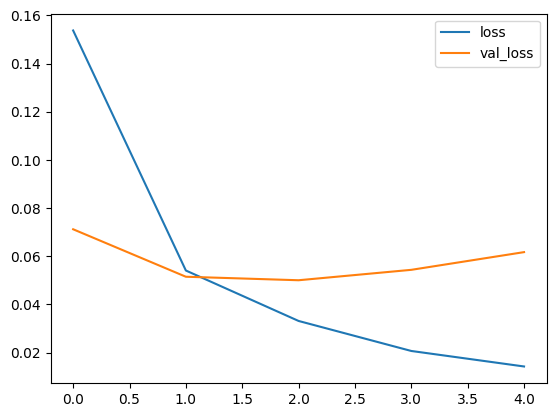

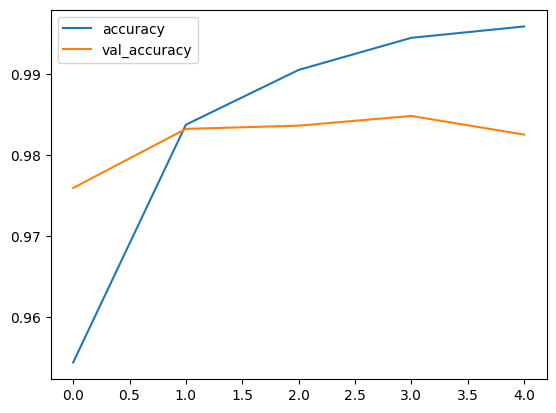

In [145]:
# After training the model, we can plot the training and validation loss and accuracy to see how the model performed during training.
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()
losses[['accuracy', 'val_accuracy']].plot()

In [146]:
model.evaluate(x_test, y_cat_test) #Final evaluation of the model on the test data to see how well it performs on unseen data. This will give us the final loss and accuracy of the model on the test set.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9825 - loss: 0.0617


[0.06169460341334343, 0.9825000166893005]